<a href="https://colab.research.google.com/github/FrederickIngle/DeepLearninghw4/blob/main/IngleAssignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#load the dataset
(x_train,y_train), (x_test,y_test) = mnist.load_data()


# Print the shape of the datasets
print("x_train shape :", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
x_train shape : (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


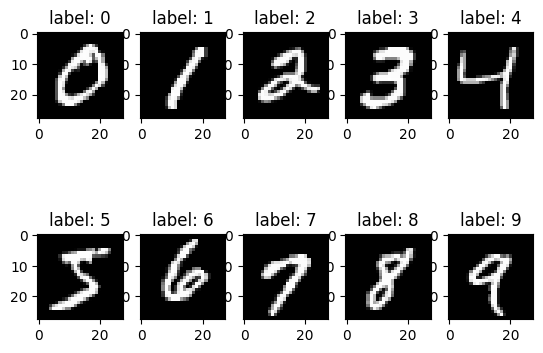

In [ ]:

#function to create grid of images
def img_plt(images,labels):
  plt.figure()
  for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1],cmap='gray')
    plt.title('label: '+ str(labels[i-1]))
plt.show()

#selecting first 10 digits from training set
x_train_rnd = np.zeros((10,28,28))
y_train_rnd = np.arange(10)
for digit in range(10):
  x_train_d = x_train[y_train==digit]
  x_train_rnd[digit] = x_train_d[0]

img_plt(x_train_rnd,y_train_rnd)

(11774, 28, 28)
(1954, 28, 28)
[1 2 3 4 5 6 7 8 9]
[9133 7172 9572 4039 8816 6513 8732 9156 5248]
The number of images in the training set is :  11274
The number of images in the validation set is :  500
The number of images in the testing set is :  1954




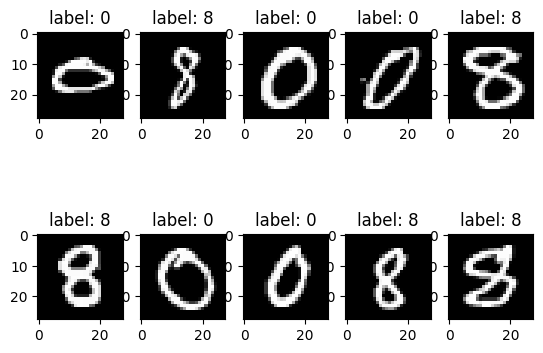

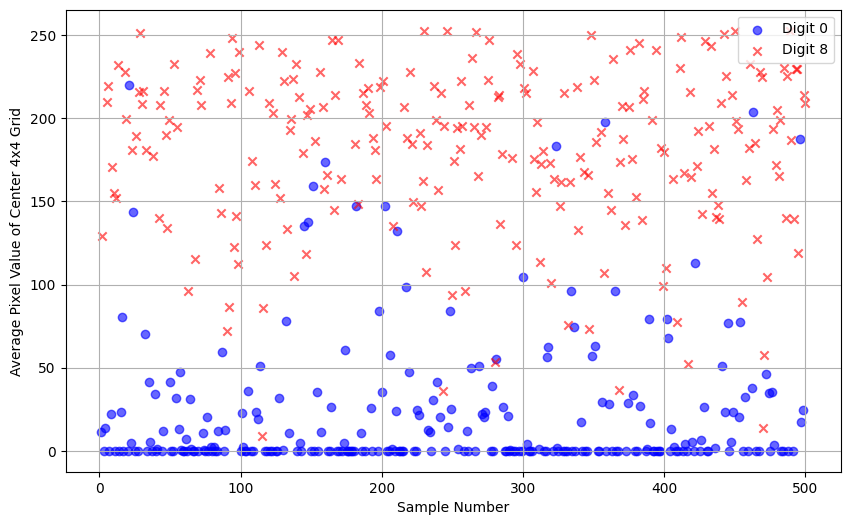

In [ ]:


#Selecting only 0 and 8 digits from training set
x_train_01 = x_train[np.logical_or(y_train==0, y_train==8)]
y_train_01 = y_train[np.logical_or(y_train==0, y_train==8)]
print(x_train_01.shape) #testing the output

#Selecting only 0 and 8 digits from testing set
x_test_01 = x_test[np.logical_or(y_test==0, y_test==8)]
y_test_01 = y_test[np.logical_or(y_test==0, y_test==8)]
print(x_test_01.shape) #testing the output


#selecting 500 random images for validation set

#shuffle data
num_train_img_ = x_train_01.shape[0]
train_ind = np.arange(0,num_train_img_)

train_ind_s = np.random.permutation(train_ind)
print(train_ind[1:10])
print(train_ind_s[1:10])

x_train_01 = x_train_01[train_ind_s, :, :]
y_train_01 = y_train_01[train_ind_s]

#selecting 500 images for validation
x_valid_01 = x_train_01[0:500]
y_valid_01 = y_train_01[0:500]


#the rest of the training set
x_train_01 = x_train_01[500:, :, :]
y_train_01 = y_train_01[500:]

print("The number of images in the training set is : ", x_train_01.shape[0])
print("The number of images in the validation set is : ", x_valid_01.shape[0])
print("The number of images in the testing set is : ", x_test_01.shape[0])




#Use the function created in part (b) to plot 10 images from the validation set.
select_images = x_valid_01[:10]
select_labels = y_valid_01[:10]

img_plt(select_images,select_labels)
print("\n")



#Calculating the training , validation, and testing feature (average of the 4x4 center grid)

#training
feature_train = np.sum(x_train_01[:,12:16, 12:16],axis = 2)
feature_train = np.sum(feature_train,axis=1)/16

#validation
feature_val = np.sum(x_valid_01[:,12:16, 12:16],axis = 2)
feature_val = np.sum(feature_val,axis=1)/16

#testing
feature_test = np.sum(x_test_01[:,12:16, 12:16],axis = 2)
feature_test = np.sum(feature_test,axis=1)/16




#Plot the attributes of 500 images
# Prepare the figure
plt.figure(figsize=(10, 6))

image_numbers = np.arange(1, 501)

# Plot attributes for digit 0
indices_0 = np.where(y_valid_01 == 0)[0]
plt.scatter(image_numbers[indices_0], feature_val[indices_0], c='blue', marker='o', label='Digit 0', alpha=0.6)


# Plot attributes for digit 8
indices_8 = np.where(y_valid_01 == 8)[0]
plt.scatter(image_numbers[indices_8], feature_val[indices_8], c='red', marker='x', label='Digit 8', alpha=0.6)


# Labeling the plot

plt.xlabel('Sample Number')
plt.ylabel('Average Pixel Value of Center 4x4 Grid')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
def accuracy(ytrue, ypred):
    # Calculate the number of correctly classified samples
    correctly_classified = np.sum(ytrue == ypred)
    # Calculate the accuracy
    accuracy = correctly_classified / len(ytrue)
    return accuracy * 100


# Zero arrays for predicitions
y_train_01_pred = np.zeros(feature_train.shape)
y_valid_01_pred = np.zeros(feature_val.shape)
y_test_01_pred = np.zeros(feature_test.shape)

threshold_i = 100
print("The selected threshold is : " + str(threshold_i))

#calc training accuracy
y_train_01_pred[feature_train > int(threshold_i)] = 8
y_train_01_pred[feature_train <= int(threshold_i)] = 0
#print training accuracy
accuracy_value = accuracy(y_train_01, y_train_01_pred)
print(f"The training accuracy is {round(accuracy_value, 2)}")

#calc testing accuracy
y_test_01_pred[feature_test > int(threshold_i)] = 8
y_test_01_pred[feature_test <= int(threshold_i)] = 0
#print testing accuracy
accuracy_value = accuracy(y_test_01, y_test_01_pred)
print(f"The testing accuracy is {round(accuracy_value, 2)}")

#calc validation accuracy
y_valid_01_pred[feature_val > int(threshold_i)] = 8
y_valid_01_pred[feature_val <= int(threshold_i)] = 0
#print validation accuracy
accuracy_value = accuracy(y_valid_01, y_valid_01_pred)
print(f"The validation accuracy is {round(accuracy_value, 2)}")

# Google Colab Link: https://colab.research.google.com/drive/1TwrBKdrTtfk4L4jblMx2GKc_nrKDoRlO?usp=sharing






The selected threshold is : 100
The training accuracy is 93.76
The testing accuracy is 95.65
The validation accuracy is 93.4
